### Importing required Library

In [5]:
import pandas as pd
from sklearn import linear_model
from sklearn import preprocessing

In [6]:
dataset_file = 'dataset.csv' # Path of the file (training data set)
df = pd.read_csv(dataset_file, index_col=0)
df.head() # preview dataframe

,EB1rmsenergy10ms mean 1,EB1rmsenergy10ms sd 1,EB3intensity mean 1,EB3intensity sd 1,EL1totalloudness mean 1,EL1totalloudness sd 1,HL1firsttristimulus mean 1,HL1firsttristimulus sd 1,HL2secondtristimulus mean 1,HL2secondtristimulus sd 1,...,TL2variance sd 1,TL3nonzerocount mean 1,TL3nonzerocount sd 1,TL4lowestvalue mean 1,TL4lowestvalue sd 1,TL5highestvalue mean 1,TL5highestvalue sd 1,TL6averagedeviation mean 1,TL6averagedeviation sd 1,mood metadata
100-club_anw1131_001.mp3,0.240140,0.060702,728.928,252.644,0.755427,0.129525,0.693388,0.216468,0.110481,0.111591,...,13145300,14.67830,13.1406,0.054871,0.020054,0.712033,0.246817,2833.03,1340.11,Bright
1000-daggers_anw1369_008.mp3,0.105963,0.055528,320.105,158.405,0.772353,0.092986,0.688717,0.233605,0.108136,0.129063,...,11085900,13.08280,10.7179,0.025222,0.017246,0.312729,0.154776,3663.17,1258.92,Driving
18-forever_anw1345_002.mp3,0.176853,0.090519,784.077,354.278,0.778773,0.131538,0.633216,0.244079,0.197348,0.167304,...,12105200,8.96436,13.1811,0.039578,0.030691,0.766027,0.346173,5074.35,1187.75,Frantic
3-in-1-tribalism_anw1992_004.mp3,0.141666,0.069601,372.860,219.924,0.683732,0.175177,0.699034,0.251840,0.134497,0.157578,...,8154260,12.19650,11.1964,0.037016,0.022369,0.364177,0.214875,2313.27,1214.24,Power
a-beautiful-ending_anw2771_003.mp3,0.113067,0.068926,240.435,140.383,0.558260,0.113480,0.658452,0.275075,0.132034,0.182691,...,36823400,13.48280,12.6010,0.028043,0.019774,0.234765,0.137180,2207.44,2752.70,Peaceful


In [7]:
labels = df['mood metadata'] # Lable of the track
labels = labels.apply(lambda x: x.strip()) # Operation to stip extra spaces.
labels.head()

100-club_anw1131_001.mp3                Bright
1000-daggers_anw1369_008.mp3           Driving
18-forever_anw1345_002.mp3             Frantic
3-in-1-tribalism_anw1992_004.mp3         Power
a-beautiful-ending_anw2771_003.mp3    Peaceful
Name: mood metadata, dtype: object

In [8]:
features_df = df[df.columns.difference(['mood metadata'])] # Take the all column data except the last one which is the label

In [9]:
features_df.head()

,SQ1mfcc20 mean 17,EB1rmsenergy10ms mean 1,EB1rmsenergy10ms sd 1,EB3intensity mean 1,EB3intensity sd 1,EL1totalloudness mean 1,EL1totalloudness sd 1,HL1firsttristimulus mean 1,HL1firsttristimulus sd 1,HL2secondtristimulus mean 1,...,TL2variance mean 1,TL2variance sd 1,TL3nonzerocount mean 1,TL3nonzerocount sd 1,TL4lowestvalue mean 1,TL4lowestvalue sd 1,TL5highestvalue mean 1,TL5highestvalue sd 1,TL6averagedeviation mean 1,TL6averagedeviation sd 1
100-club_anw1131_001.mp3,0.047874,0.240140,0.060702,728.928,252.644,0.755427,0.129525,0.693388,0.216468,0.110481,...,9841180,13145300,14.67830,13.1406,0.054871,0.020054,0.712033,0.246817,2833.03,1340.11
1000-daggers_anw1369_008.mp3,-0.010989,0.105963,0.055528,320.105,158.405,0.772353,0.092986,0.688717,0.233605,0.108136,...,15033000,11085900,13.08280,10.7179,0.025222,0.017246,0.312729,0.154776,3663.17,1258.92
18-forever_anw1345_002.mp3,0.082787,0.176853,0.090519,784.077,354.278,0.778773,0.131538,0.633216,0.244079,0.197348,...,27212900,12105200,8.96436,13.1811,0.039578,0.030691,0.766027,0.346173,5074.35,1187.75
3-in-1-tribalism_anw1992_004.mp3,-0.035056,0.141666,0.069601,372.860,219.924,0.683732,0.175177,0.699034,0.251840,0.134497,...,6838950,8154260,12.19650,11.1964,0.037016,0.022369,0.364177,0.214875,2313.27,1214.24
a-beautiful-ending_anw2771_003.mp3,-0.187467,0.113067,0.068926,240.435,140.383,0.558260,0.113480,0.658452,0.275075,0.132034,...,12474500,36823400,13.48280,12.6010,0.028043,0.019774,0.234765,0.137180,2207.44,2752.70


In [10]:
features_df.as_matrix()

array([[  4.78741000e-02,   2.40140000e-01,   6.07025000e-02, ...,
          2.46817000e-01,   2.83303000e+03,   1.34011000e+03],
       [ -1.09887000e-02,   1.05963000e-01,   5.55278000e-02, ...,
          1.54776000e-01,   3.66317000e+03,   1.25892000e+03],
       [  8.27871000e-02,   1.76853000e-01,   9.05193000e-02, ...,
          3.46173000e-01,   5.07435000e+03,   1.18775000e+03],
       ..., 
       [ -1.29742000e-01,   6.97167000e-02,   4.79892000e-02, ...,
          1.58649000e-01,   3.58837000e+03,   1.96510000e+03],
       [ -2.89274000e-01,   1.24216000e-01,   6.52597000e-02, ...,
          9.82264000e-02,   9.00845000e+02,   7.62604000e+02],
       [  3.67516000e-01,   4.67684000e-02,   5.73761000e-02, ...,
          3.22150000e-01,   4.69042000e+03,   1.77437000e+03]])

In [11]:
""" r  = [  [2 ,3 ,4],
            [43, 45, 5],
            [43, 5, 645],
            [4, 45, 5],
            [43, 45, 5],
            ]
"""
features_df
X = features_df.as_matrix()

In [13]:
labels.head()

100-club_anw1131_001.mp3                Bright
1000-daggers_anw1369_008.mp3           Driving
18-forever_anw1345_002.mp3             Frantic
3-in-1-tribalism_anw1992_004.mp3         Power
a-beautiful-ending_anw2771_003.mp3    Peaceful
Name: mood metadata, dtype: object

In [15]:
le = preprocessing.LabelEncoder() # To convert string label to int label
le.fit(labels)
Y = le.transform(labels)

In [7]:
X

array([[ 4.78741e-02,  2.40140e-01,  6.07025e-02, ...,  2.46817e-01,
         2.83303e+03,  1.34011e+03],
       [-1.09887e-02,  1.05963e-01,  5.55278e-02, ...,  1.54776e-01,
         3.66317e+03,  1.25892e+03],
       [ 8.27871e-02,  1.76853e-01,  9.05193e-02, ...,  3.46173e-01,
         5.07435e+03,  1.18775e+03],
       ...,
       [-1.29742e-01,  6.97167e-02,  4.79892e-02, ...,  1.58649e-01,
         3.58837e+03,  1.96510e+03],
       [-2.89274e-01,  1.24216e-01,  6.52597e-02, ...,  9.82264e-02,
         9.00845e+02,  7.62604e+02],
       [ 3.67516e-01,  4.67684e-02,  5.73761e-02, ...,  3.22150e-01,
         4.69042e+03,  1.77437e+03]])

In [17]:
Y[:3]

array([ 7, 20, 26])

In [19]:
le.inverse_transform([7, 0 ])

array(['Bright', 'Ambient'], dtype=object)

In [21]:
labels.unique()

array(['Bright', 'Driving', 'Frantic', 'Power', 'Peaceful', 'Sad', 'Drama',
       'Dance Club', 'Urban', 'Romantic', 'Neutral', 'Warm', 'Funny',
       'Thoughtful', 'Fantasy', 'Orchestral', 'Quirky', 'Jaunty', 'Cheese',
       'Tension', 'Dawn', 'Celebration', 'Sci-Fi', 'Exotic', 'Luxury',
       'Ambient', 'Chill Out', 'Majestic', 'Inspiring', 'Hypnotic',
       'Nostalgic', 'Panoramic', 'Beautiful', 'Dream', 'Dramatic',
       'Laid Back', 'Light Tension', 'Heroic', 'Dark', 'Anger', 'Intimate',
       'Horror', 'Regal', 'Electronic', 'Happy', 'Hot', 'Ballads',
       'Cumbersome', 'Ghostly', 'Stealth', 'Sexy', 'Drone', 'Violence',
       'Dance', 'Anthemic', 'Magic', 'Simple', 'Cold', 'Background',
       'Slow Motion', 'Sea', 'Erotic', 'Schmaltz', 'Beds'], dtype=object)

In [20]:
len(labels.unique())

64

In [22]:
ridge_classifier_cv = linear_model.RidgeClassifierCV(cv=10) # Cross fold valiation helps you to understand weather your model is underfittnng or over fitting

In [23]:
model = ridge_classifier_cv.fit(X, Y)

/Users/akushwaha/Projects/pipe-api/.venv/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number2.429393e-19
  overwrite_a=True).T
/Users/akushwaha/Projects/pipe-api/.venv/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number2.481888e-19
  overwrite_a=True).T
/Users/akushwaha/Projects/pipe-api/.venv/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number2.390626e-19
  overwrite_a=True).T
/Users/akushwaha/Projects/pipe-api/.venv/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result 

/Users/akushwaha/Projects/pipe-api/.venv/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number2.247685e-17
  overwrite_a=True).T


In [26]:
model.coef_

array([[ -5.78531371e-02,   1.28802968e-03,   3.61012874e-03, ...,
          3.25075054e-05,   2.06347735e-03,   2.15230690e-04],
       [ -1.85741710e-02,   4.19568876e-03,   5.46595789e-03, ...,
          2.21847511e-05,  -2.54993679e-03,   2.44170654e-04],
       [ -1.55942481e-02,  -9.45214420e-04,   8.68299430e-04, ...,
          2.41051722e-05,   4.72443946e-04,  -6.11653601e-04],
       ..., 
       [  5.63176527e-03,  -2.90290118e-03,  -4.05690297e-03, ...,
          3.46538409e-05,   7.98796768e-05,  -1.74860831e-03],
       [ -1.41946077e-02,   1.78079154e-03,   2.28368759e-03, ...,
          1.76824835e-06,  -1.05859785e-04,  -1.96861465e-05],
       [  5.17738161e-02,  -3.34814050e-03,  -4.85082223e-03, ...,
          5.16634164e-05,  -2.08861014e-04,   8.15484576e-05]])

In [24]:
model.coef_.shape

(64, 487)

## To calculate the weights of each feature:
I need to train one classifier per label
given a track train a model for telling whether the mood is happy or not. Once done, it will learn weights about how important each feature for classifying "happy mood"
to calculate the weights of each features

Then I can average all the weights, i.e., each classifier will give what weights it assign to each feature, need to take an average along  each feature dimension. This will give how important each feature dimension is for the mood classification task. Later, we need to calculate Euclidean distance by scaling each dimension to its learned weight.

In [30]:
from matplotlib import pyplot as plt

In [35]:
def label_feature_importances(label, top=10):
        coef = model.coef_ # Label-Feature importance matrix
        names = list(features_df.columns)
        class_name = label # label for which the graph needs to be plotted
        index = le.transform([label])[0] #  To get the index of the label in the model.coef_ matrix
        classes_coef = coef[index] # Extract the feature importance row from the model.coef_ matrix 
        print('Feature Importance for Feaure: {}'.format(class_name))
        imp, names = zip(*sorted(zip(classes_coef, names)))
        sliced_imp = imp[-top:] # Select the last top elements from the list
        sliced_names = names[-top:]        
        plt.barh(range(len(sliced_names)), sliced_imp, align='center')
        plt.yticks(range(len(sliced_names)), sliced_names)
        plt.show()

In [36]:
le.transform(['Horror'])[0]

31

In [37]:
le.classes_

array(['Ambient', 'Anger', 'Anthemic', 'Background', 'Ballads',
       'Beautiful', 'Beds', 'Bright', 'Celebration', 'Cheese', 'Chill Out',
       'Cold', 'Cumbersome', 'Dance', 'Dance Club', 'Dark', 'Dawn',
       'Drama', 'Dramatic', 'Dream', 'Driving', 'Drone', 'Electronic',
       'Erotic', 'Exotic', 'Fantasy', 'Frantic', 'Funny', 'Ghostly',
       'Happy', 'Heroic', 'Horror', 'Hot', 'Hypnotic', 'Inspiring',
       'Intimate', 'Jaunty', 'Laid Back', 'Light Tension', 'Luxury',
       'Magic', 'Majestic', 'Neutral', 'Nostalgic', 'Orchestral',
       'Panoramic', 'Peaceful', 'Power', 'Quirky', 'Regal', 'Romantic',
       'Sad', 'Schmaltz', 'Sci-Fi', 'Sea', 'Sexy', 'Simple', 'Slow Motion',
       'Stealth', 'Tension', 'Thoughtful', 'Urban', 'Violence', 'Warm'], dtype=object)

Feature Importance for Feaure: Warm


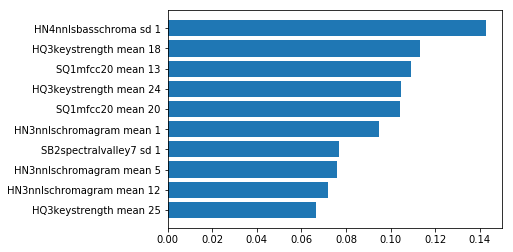

In [39]:
label_feature_importances('Warm')

Feature Importance for Feaure: Happy


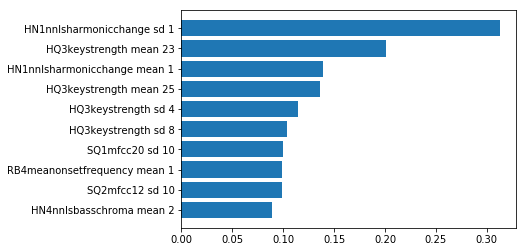

In [40]:
label_feature_importances('Happy')

Feature Importance for Feaure: Sad


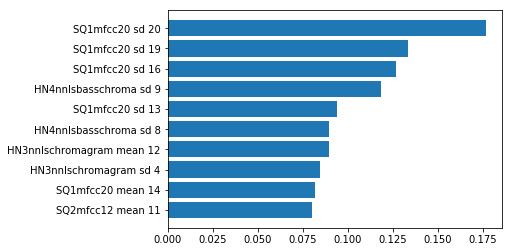

In [41]:
label_feature_importances('Sad')

In [42]:
def plot_all_feature_importances(top=20):  
    coef = model.coef_
    names = list(df.columns.difference(['mood metadata']))

    for index, classes_coef in enumerate(coef):
        class_name = le.inverse_transform(index)
        print('Feature Importance for Feaure: {}'.format(class_name))
        imp, names = zip(*sorted(zip(classes_coef, names)))
        imp = imp[-top:]
        names = names[-top:]        
        plt.barh(range(len(names)), imp, align='center')
        plt.yticks(range(len(names)), names)
        plt.show()
        inp = input("press 'q' to quit(just Enter to continue...)")
        if inp == 'q':
            break
            

Feature Importance for Feaure: Ambient


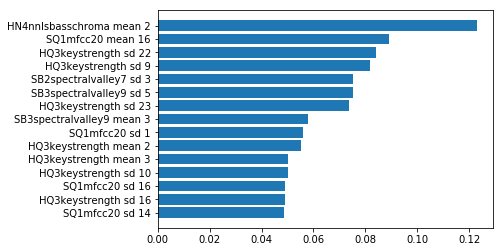

press 'q' to quit(just Enter to continue...)
Feature Importance for Feaure: Anger


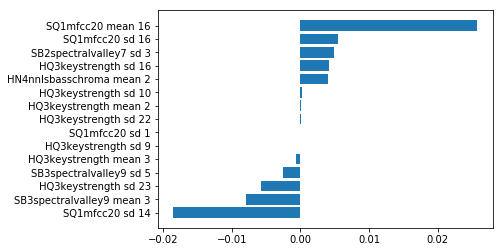

press 'q' to quit(just Enter to continue...)q


In [44]:
plot_all_feature_importances(15)